<a href="https://colab.research.google.com/github/AstorBoy11/Kuis-Machine-Learning/blob/main/Copy_of_JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [10]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [70]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
for col in ['workclass', 'occupation', 'native-country']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


/tmp/ipython-input-2690069925.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [21]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
print(df.info())
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

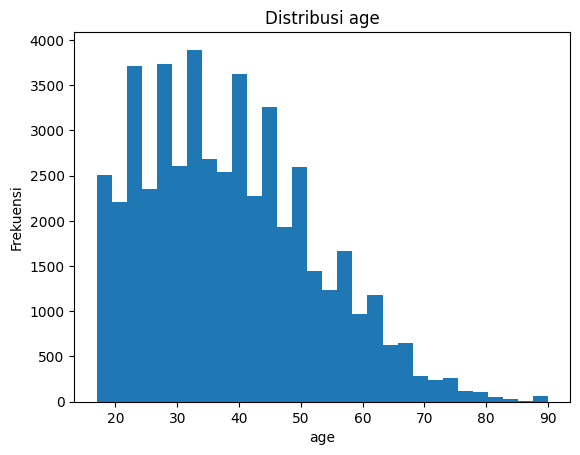

In [23]:
# Jawab 1.1 - Histrogram
num_cols = ['age']
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col); plt.ylabel('Frekuensi')
    plt.show()

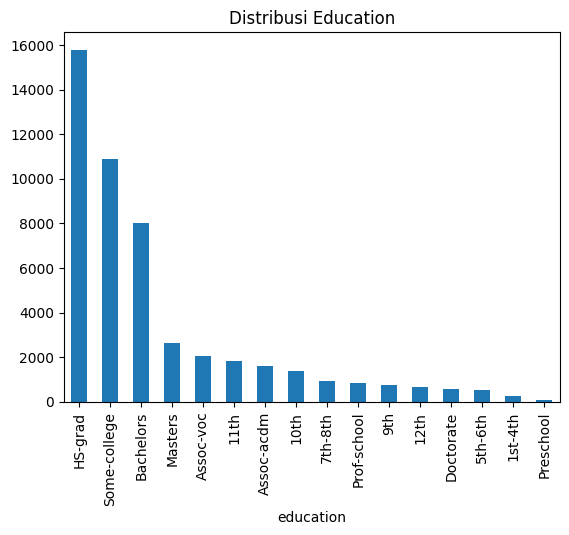

In [68]:
# Jawab 1.2 - Barchart
df['education'].value_counts().plot(kind='bar')
plt.title('Distribusi Education')
plt.show()

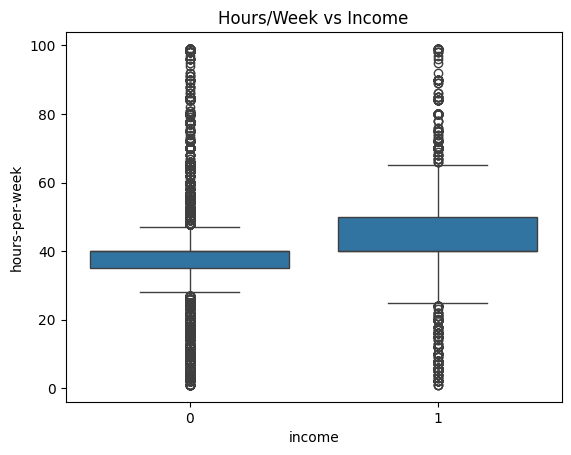

In [67]:
# Jawab 1.3 - Boxplot
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours/Week vs Income')
plt.show()

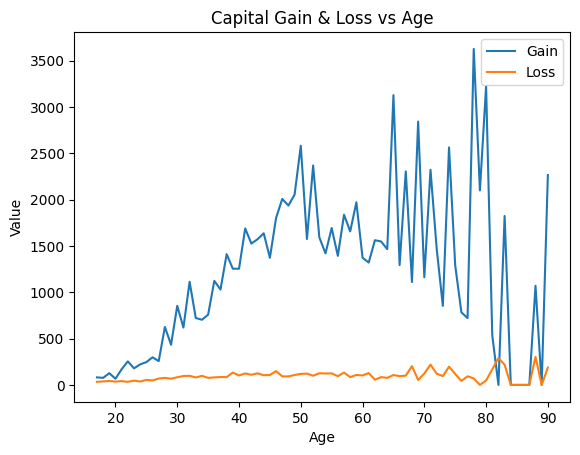

In [66]:
# Jawab 1.4 - Lineplot
grp = df.groupby('age')[['capital-gain','capital-loss']].mean()
plt.plot(grp.index, grp['capital-gain'], label='Gain')
plt.plot(grp.index, grp['capital-loss'], label='Loss')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Value')
plt.title('Capital Gain & Loss vs Age')
plt.show()


## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [39]:
# Jawab dengan komentar python

'''
  1. Fenomena apa yang terjadi pada distribusi data 'age'?
  Jawab :
  Distribusi data pada variabel age dalam dataset Adult Income menunjukkan pola
  right-skewed, di mana mayoritas responden berada pada rentang usia produktif
  yaitu sekitar 20–50 tahun, sementara jumlah individu menurun drastis pada usia
  lanjut di atas 60 tahun.

  2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda
  terapkan? Mengapa?
  Jawab :
  strategi yang paling tepat adalah melakukan imputasi menggunakan
  median. Hal ini dipilih karena median lebih tahan terhadap pengaruh outlier
  dibandingkan mean, sehingga distribusi umur tetap representatif terhadap
  populasi sebenarnya.

  3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan
  'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?
  Jawab :
  hasil analisis outlier pada variabel hours-per-week yang dikelompokkan
  berdasarkan income menunjukkan bahwa kedua kategori (<=50K dan >50K) sama-sama
  memiliki sejumlah outlier, terutama pada jam kerja yang sangat rendah maupun
  sangat tinggi
'''

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [65]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
from sklearn.preprocessing import LabelEncoder

df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['income'] = LabelEncoder().fit_transform(df['income'])

df[['sex','income']].head()

,sex,income
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

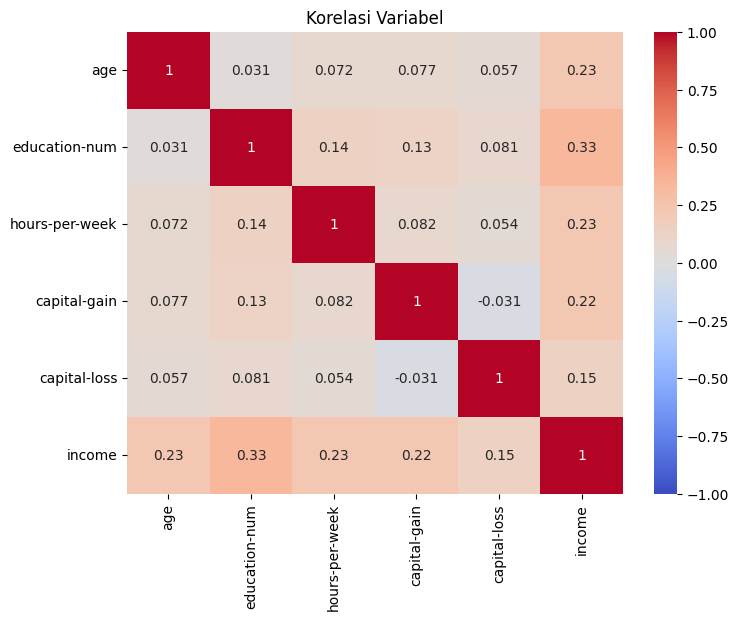

In [64]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
cols = ['age','education-num','hours-per-week','capital-gain','capital-loss','income']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Variabel")
plt.show()

In [54]:
# Hasil analisis jelaskan pada cell ini
'''
faktor pendidikan, usia, jam kerja per minggu, dan capital-gain adalah prediktor
yang cukup penting terhadap tingkat pendapatan, meskipun kekuatan korelasinya
masih tergolong sedang dan tidak terlalu kuat.
'''

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [55]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


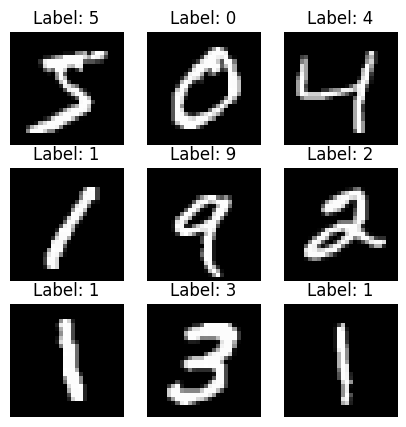

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

Shape data setelah upsampling: (10000, 32, 32)


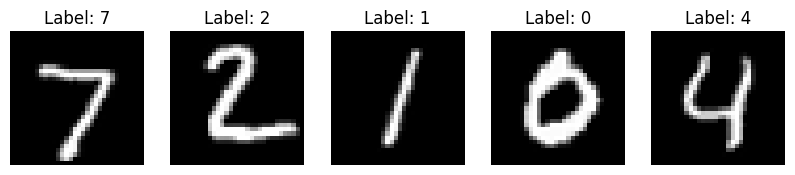

In [59]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(_, _), (x_test, y_test) = mnist.load_data()

x_test_up = np.zeros((x_test.shape[0], 32, 32), dtype=np.float32)

for i in range(x_test.shape[0]):
    x_test_up[i] = cv2.resize(x_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)
print("Shape data setelah upsampling:", x_test_up.shape)

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test_up[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()



## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

Nilai minimum: 0.0
Nilai maksimum: 1.0
Shape data normalisasi: (10000, 32, 32)
Shape asli: (10000, 28, 28)
Shape setelah upsampling: (10000, 32, 32)
Nilai minimum: 0.0
Nilai maksimum: 1.0
Shape normalisasi: (10000, 32, 32)


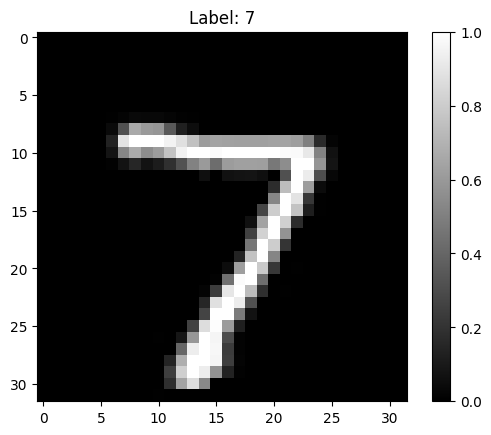

In [61]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
x_test_norm = x_test_up / 255.0

print("Nilai minimum:", x_test_norm.min())
print("Nilai maksimum:", x_test_norm.max())
print("Shape data normalisasi:", x_test_norm.shape)

(_, _), (X_test, y_test) = mnist.load_data()
print("Shape asli:", X_test.shape)
X_test_up = np.zeros((X_test.shape[0], 32, 32), dtype=np.float32)
for i in range(X_test.shape[0]):
    X_test_up[i] = cv2.resize(X_test[i], (32, 32), interpolation=cv2.INTER_CUBIC)

print("Shape setelah upsampling:", X_test_up.shape)

X_test_norm = X_test_up / 255.0
print("Nilai minimum:", X_test_norm.min())
print("Nilai maksimum:", X_test_norm.max())
print("Shape normalisasi:", X_test_norm.shape)

plt.imshow(X_test_norm[0], cmap="gray")
plt.title(f"Label: {y_test[0]}")
plt.colorbar()
plt.show()


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [63]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
X_test_flat = np.zeros((X_test_norm.shape[0], 32*32), dtype=np.float32)

for i in range(X_test_norm.shape[0]):
    X_test_flat[i] = X_test_norm[i].reshape(-1)

print("Shape setelah flatten:", X_test_flat.shape)

print("Contoh array flatten:", X_test_flat[0][:10])


Shape setelah flatten: (10000, 1024)
Contoh array flatten: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
